# Predicción de Precios de Vehículos Usados (Core)





Objetivo

Implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.



Dataset

https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data



# **OBSERVACIÓN IMPORTANTE: **

Me fue imposible cargar el archivo csv original en el Colab, pesa 1,34 GB (1.447.955.215 bytes) y tiene 447088 registros o filas, según excel

Con Claude pude hacer algo como cargarlo directamente de Kaggle, pero aquí carga otra cantidad de registros, menor 426880, supongo que también debe deberse a que el mismo csv tiene demasiados errores, como que la mayoría de los datos están en la columna A, pero algunsa observaciones tiene datos en la columna B por ejemplo

- Se intentó continuar de esa manera, pero en algún punto, sin avanzar mucho, el sistema se queda sin recursos en la RAM, entonces se reinicia, y no deja hacer gran cosa.

- Para esto, dejo el código inicial, pero dividí el dataset original cargado desde kaggle para poder hacer el Core, pero trabajé desde el inicio con el dataset completo, y ni este ni la mitad de los datos fue posible avanzar de una buena manera, así que trabajé con el 25% de este, 106720 registros, lo cual me dicen dos IA que es bueno para modelar




**Claude**

Te ayudo a importar el dataset de vehículos de Craigslist en Google Colab. Como no puedo acceder directamente al enlace, te mostraré el proceso paso a paso:

Primero, necesitarás descargar el archivo de Kaggle y obtener tus credenciales de Kaggle:

In [ ]:
# Instalar la API de Kaggle
!pip install kaggle

# Crear el directorio para las credenciales de Kaggle
!mkdir -p ~/.kaggle

**Claude**

Necesitarás crear un archivo token de Kaggle:


- Ve a tu cuenta de Kaggle (kaggle.com)
- Ve a "Account"
- Desplázate hasta "API"
- Haz clic en "Create New API Token"
- Esto descargará un archivo kaggle.json


Sube el archivo kaggle.json a Colab:


- En el panel izquierdo de Colab, haz clic en el ícono de carpeta
- Arrastra y suelta el archivo kaggle.json que descargaste


Mueve el archivo a la ubicación correcta y establece los permisos:

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**Claude**

Ahora puedes descargar el dataset directamente:

In [ ]:
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip craigslist-carstrucks-data.zip

Dataset URL: https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
License(s): CC0-1.0
 99% 260M/262M [00:11<00:00, 27.7MB/s]
100% 262M/262M [00:11<00:00, 24.0MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


**Claude**

Finalmente, lee el archivo CSV con pandas:



In [ ]:
import pandas as pd

# Lee el archivo CSV
df = pd.read_csv('vehicles.csv')

# Muestra las primeras filas para verificar
print(df.head())

           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN

In [ ]:
df.to_csv('exported_df_100.csv', index=False)  # Set index=False to avoid saving the index column

In [ ]:
df_copy1 = df.copy()
fraction = 0.5  # Cambia esto a 0.33 o el porcentaje que prefieras

df_sample = df_copy1.sample(frac=fraction, random_state=42)  # Muestra aleatoria
df_remaining = df_copy1.drop(df_sample.index)

In [ ]:
df_sample.to_csv('df_sample50.csv', index=False)
df_remaining.to_csv('df_remaining50.csv', index=False)

In [ ]:
df_copy2 = df.copy()

# Dividir en 4 partes iguales
num_parts = 4
dfs = np.array_split(df_copy2, num_parts)

# Verificar tamaños
for i, part in enumerate(dfs):
    print(f"Tamaño de la parte {i+1}: {part.shape}")

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Tamaño de la parte 1: (106720, 26)
Tamaño de la parte 2: (106720, 26)
Tamaño de la parte 3: (106720, 26)
Tamaño de la parte 4: (106720, 26)


In [ ]:
for i, part in enumerate(dfs):
    file_name = f'df_part_{i+1}.csv'  # Nombre del archivo
    part.to_csv(file_name, index=False)  # Exportar a CSV sin incluir el índice
    print(f"Parte {i+1} guardada como {file_name}")

Parte 1 guardada como df_part_1.csv
Parte 2 guardada como df_part_2.csv
Parte 3 guardada como df_part_3.csv
Parte 4 guardada como df_part_4.csv


# 1)Carga y Exploración de Datos:



## - Descargar y cargar el dataset.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('/content/3_Core_df_part_1_25.csv')

## - Realizar una exploración inicial para entender la estructura del dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106720 entries, 0 to 106719
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            106720 non-null  int64  
 1   url           106720 non-null  object 
 2   region        106720 non-null  object 
 3   region_url    106720 non-null  object 
 4   price         106720 non-null  int64  
 5   year          106287 non-null  float64
 6   manufacturer  102005 non-null  object 
 7   model         105341 non-null  object 
 8   condition     65482 non-null   object 
 9   cylinders     63469 non-null   object 
 10  fuel          106089 non-null  object 
 11  odometer      105149 non-null  float64
 12  title_status  104357 non-null  object 
 13  transmission  106128 non-null  object 
 14  VIN           68172 non-null   object 
 15  drive         74087 non-null   object 
 16  size          30276 non-null   object 
 17  type          85865 non-null   object 
 18  pain

In [ ]:
def uniq (df):
    df=pd.DataFrame([[i,df[i].unique(),df[i].dtype,len(df[i].unique())]for i in df.columns],columns=['feature','val','types','len']).set_index('feature')
    return df

In [ ]:
unique= uniq(df)
unique

,val,types,len
feature,,,
id,"[7222695916, 7218891961, 7221797935, 722227076...",int64,106720
url,[https://prescott.craigslist.org/cto/d/prescot...,object,106720
region,"[prescott, fayetteville, florida keys, worcest...",object,89
region_url,"[https://prescott.craigslist.org, https://faya...",object,89
price,"[6000, 11900, 21000, 1500, 4900, 1600, 1000, 1...",int64,6870
year,"[nan, 2014.0, 2010.0, 2020.0, 2017.0, 2013.0, ...",float64,105
manufacturer,"[nan, gmc, chevrolet, toyota, ford, jeep, niss...",object,42
model,"[nan, sierra 1500 crew cab slt, silverado 1500...",object,12976
condition,"[nan, good, excellent, fair, like new, new, sa...",object,7


In [ ]:
df.describe().round(2)

,id,price,year,odometer,county,lat,long
count,1.067200e+05,1.067200e+05,106287.00,105149.00,0.0,106129.00,106129.00
mean,7.311946e+09,1.052452e+05,2011.00,97253.16,NaN,36.30,-106.01
std,4.646391e+06,1.424690e+07,9.98,234915.32,NaN,6.10,18.82
min,7.208550e+09,0.000000e+00,1900.00,0.00,NaN,-84.12,-158.60
25%,7.308707e+09,5.997000e+03,2008.00,37139.00,NaN,33.57,-120.50
50%,7.313470e+09,1.399500e+04,2014.00,83025.00,NaN,35.38,-112.10
75%,7.315623e+09,2.599000e+04,2017.00,130000.00,NaN,38.82,-84.45
max,7.316956e+09,3.024942e+09,2022.00,10000000.00,NaN,82.39,173.89


### -> Análisis
26 variables, muchas se pueden descartar, y se evidencia problemas con valores nulos, además de que por falta de documentación clara, algunas columnas deberían revisarse mejor, además valores extremos que indican outliers en todas las variables que están codificadas como de tipo numérico

## - Identificar valores faltantes, duplicados y outliers.


In [ ]:
# Calcular el porcentaje de nulos diferente de cero para cada columna
porcentaje_nulos = ((df.isnull().sum() / len(df)) * 100).round(2)

# Mostrar el porcentaje de nulos diferente de cero
print(porcentaje_nulos[porcentaje_nulos != 0])

year              0.41
manufacturer      4.42
model             1.29
condition        38.64
cylinders        40.53
fuel              0.59
odometer          1.47
title_status      2.21
transmission      0.55
VIN              36.12
drive            30.58
size             71.63
type             19.54
paint_color      29.60
image_url         0.04
description       0.04
county          100.00
lat               0.55
long              0.55
posting_date      0.04
dtype: float64


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Regla simple del IQR para una columna
def check_outliers_simple(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)][columna]

    print(f"\nAnálisis de outliers para {columna}:")
    print(f"Límite inferior: {limite_inferior}")
    print(f"Límite superior: {limite_superior}")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {(len(outliers)/len(df))*100:.2f}%")

In [ ]:
# Análisis rápido del precio
check_outliers_simple(df, 'price')

# Ver algunos precios extremos
print("\nPrecios más altos:")
print(df['price'].nlargest(10))


Análisis de outliers para price:
Límite inferior: -23992.5
Límite superior: 55979.5
Número de outliers: 2489
Porcentaje de outliers: 2.33%

Precios más altos:
91576     3024942282
37410     3009548743
29386     1111111111
37409     1111111111
280        987654321
1838        99999999
105843       6995495
68935        2000000
26075        1111111
83367        1000000
Name: price, dtype: int64


In [ ]:
# Análisis rápido del precio
check_outliers_simple(df, 'odometer')

# Ver algunos precios extremos
print("\nTop 10 más altos:")
print(df['odometer'].nlargest(10))
print("\nTop 10 más bajos:")
print(df['odometer'].nsmallest(10))


Análisis de outliers para odometer:
Límite inferior: -102152.5
Límite superior: 269291.5
Número de outliers: 1266
Porcentaje de outliers: 1.19%

Top 10 más altos:
9218      10000000.0
23100     10000000.0
28738     10000000.0
34717     10000000.0
44280     10000000.0
67001     10000000.0
67003     10000000.0
81327     10000000.0
103798    10000000.0
105059    10000000.0
Name: odometer, dtype: float64

Top 10 más bajos:
538     0.0
563     0.0
694     0.0
889     0.0
985     0.0
1192    0.0
1195    0.0
1199    0.0
1373    0.0
1720    0.0
Name: odometer, dtype: float64


### -> Análisis
Hay columnas con porcentajes de nulos demasiado altos, por lo que, habría que se deberían revisar el eliminar algunas columnas, y revisar si quitando nulos o imputando, se puede dar otro tipo de información,
No hay duplicados
Si hay outliers

# 2) Limpieza y Preprocesamiento:



## - Manejar valores faltantes.


In [ ]:
# Eliminar columnas con un porcentaje de valores nulos superior a un umbral
umbral = 30  # Porcentaje de nulos
columnas_a_eliminar = porcentaje_nulos[porcentaje_nulos > umbral].index
df = df.drop(columnas_a_eliminar, axis=1)

# Mostrar las columnas restantes
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
# Imputar los valores nulos de la columna 'type' con 'unknown'
df['type'].fillna('unknown', inplace=True)

<ipython-input-20-8a07608cbc48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna('unknown', inplace=True)


In [ ]:
# Eliminar filas con al menos un valor nulo en cualquier columna
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69166 entries, 27 to 106718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            69166 non-null  int64  
 1   url           69166 non-null  object 
 2   region        69166 non-null  object 
 3   region_url    69166 non-null  object 
 4   price         69166 non-null  int64  
 5   year          69166 non-null  float64
 6   manufacturer  69166 non-null  object 
 7   model         69166 non-null  object 
 8   fuel          69166 non-null  object 
 9   odometer      69166 non-null  float64
 10  title_status  69166 non-null  object 
 11  transmission  69166 non-null  object 
 12  type          69166 non-null  object 
 13  paint_color   69166 non-null  object 
 14  image_url     69166 non-null  object 
 15  description   69166 non-null  object 
 16  state         69166 non-null  object 
 17  lat           69166 non-null  float64
 18  long          69166 non-null 

### -> Análisis
Se eliminaron columnas con más del 30% de datos nulos, al ser un dataset con tantas observaciones, posiblemente el perder estas columnas no afecte de manera significativa la capacidad predictiva de los modelos a correr, además, el imputar de alguna manera más del 30% de los datos (o incluso 70 o 100%) puede generar ruido e incluso sesgos en los datos, además algunas pueden no ser cruciales para el análisis principal

    -> Predicción de precios de vehículos usados

En el caso de columnas menor al 30% se imputó con la revisón de que al ser type, se pondría desconocido, y revisar como funcionan los modelos con este valor, sino, igual en la selección de características esta variable saldría, depende de correlaciones y otros análisis

Para columnas con <5% de datos nulos, se decidió eliminar y revisar la pérdida en registros del dataset, quedando el 89% de los registros del dataset original pasando de 26 a 19 columnas

## - Eliminar duplicados.


In [ ]:
df.duplicated().sum()

0

### -> Análisis
No hay duplicados a eliminar

## - Corregir inconsistencias en los datos categóricos.


In [ ]:
# Mostrar todos los valores unicos de las columnas
def show_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}")
        print(f"Unique values: {unique_values}")
        print("-" * 20)

show_unique_values(df)

Column: id
Unique values: [7316814884 7316814758 7316814989 ... 7312385970 7312384300 7312354452]
--------------------
Column: url
Unique values: ['https://auburn.craigslist.org/ctd/d/auburn-university-2014-gmc-sierra-1500/7316814884.html'
 'https://auburn.craigslist.org/ctd/d/auburn-university-2010-chevy-chevrolet/7316814758.html'
 'https://auburn.craigslist.org/ctd/d/auburn-university-2020-chevy-chevrolet/7316814989.html'
 ...
 'https://orlando.craigslist.org/ctd/d/orlando-2018-kia-soul-wagon-4d-wagon/7312385970.html'
 'https://orlando.craigslist.org/ctd/d/orlando-2018-mercedes-maybach-s560-with/7312384300.html'
 'https://orlando.craigslist.org/ctd/d/kissimmee-2015-toyota-corolla-plus-6mt/7312354452.html']
--------------------
Column: region
Unique values: ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' '

In [ ]:
# Eliminar columnas especificadas
columns_to_drop = ['id', 'url', 'region_url', 'description', 'image_url']
df = df.drop(columns=columns_to_drop, errors='ignore')

### -> Análisis
Se revisó manualmente datos categóricos, con la mayoría se decidió no hacer algún tipo de corrección en cuanto a inconsistencias, más por falta de documentación y de posibles malinterpretaciones que se den, por ejemplo en model 'silverado 1500' puede ser lo mismo que 'silverado 1500 crew' o no.
Pese a esto, si se decidió eliminar algunas columnas que suponemos no dan tampoco algún tipo de información en algún análisis, bien sea porque eran valores únicos (como algunos url), o decían la misma información que otras columnas dejadas, o la columna description que si bien puede ser útil, se requeriría otro tipo de análisis, más de textos o sentimientos para poder utilizar esta variable como característica en los modelos a correr

## - Escalar las características numéricas.


In [ ]:
df_copy = df.copy()

In [ ]:
df.to_csv('3_Core_df_part_1_25_EDA_1.csv', index=False)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/3_Core_df_part_1_25_EDA_1.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69166 entries, 0 to 69165
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        69166 non-null  object 
 1   price         69166 non-null  int64  
 2   year          69166 non-null  float64
 3   manufacturer  69166 non-null  object 
 4   model         69166 non-null  object 
 5   fuel          69166 non-null  object 
 6   odometer      69166 non-null  float64
 7   title_status  69166 non-null  object 
 8   transmission  69166 non-null  object 
 9   type          69166 non-null  object 
 10  paint_color   69166 non-null  object 
 11  state         69166 non-null  object 
 12  lat           69166 non-null  float64
 13  long          69166 non-null  float64
 14  posting_date  69166 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 7.9+ MB


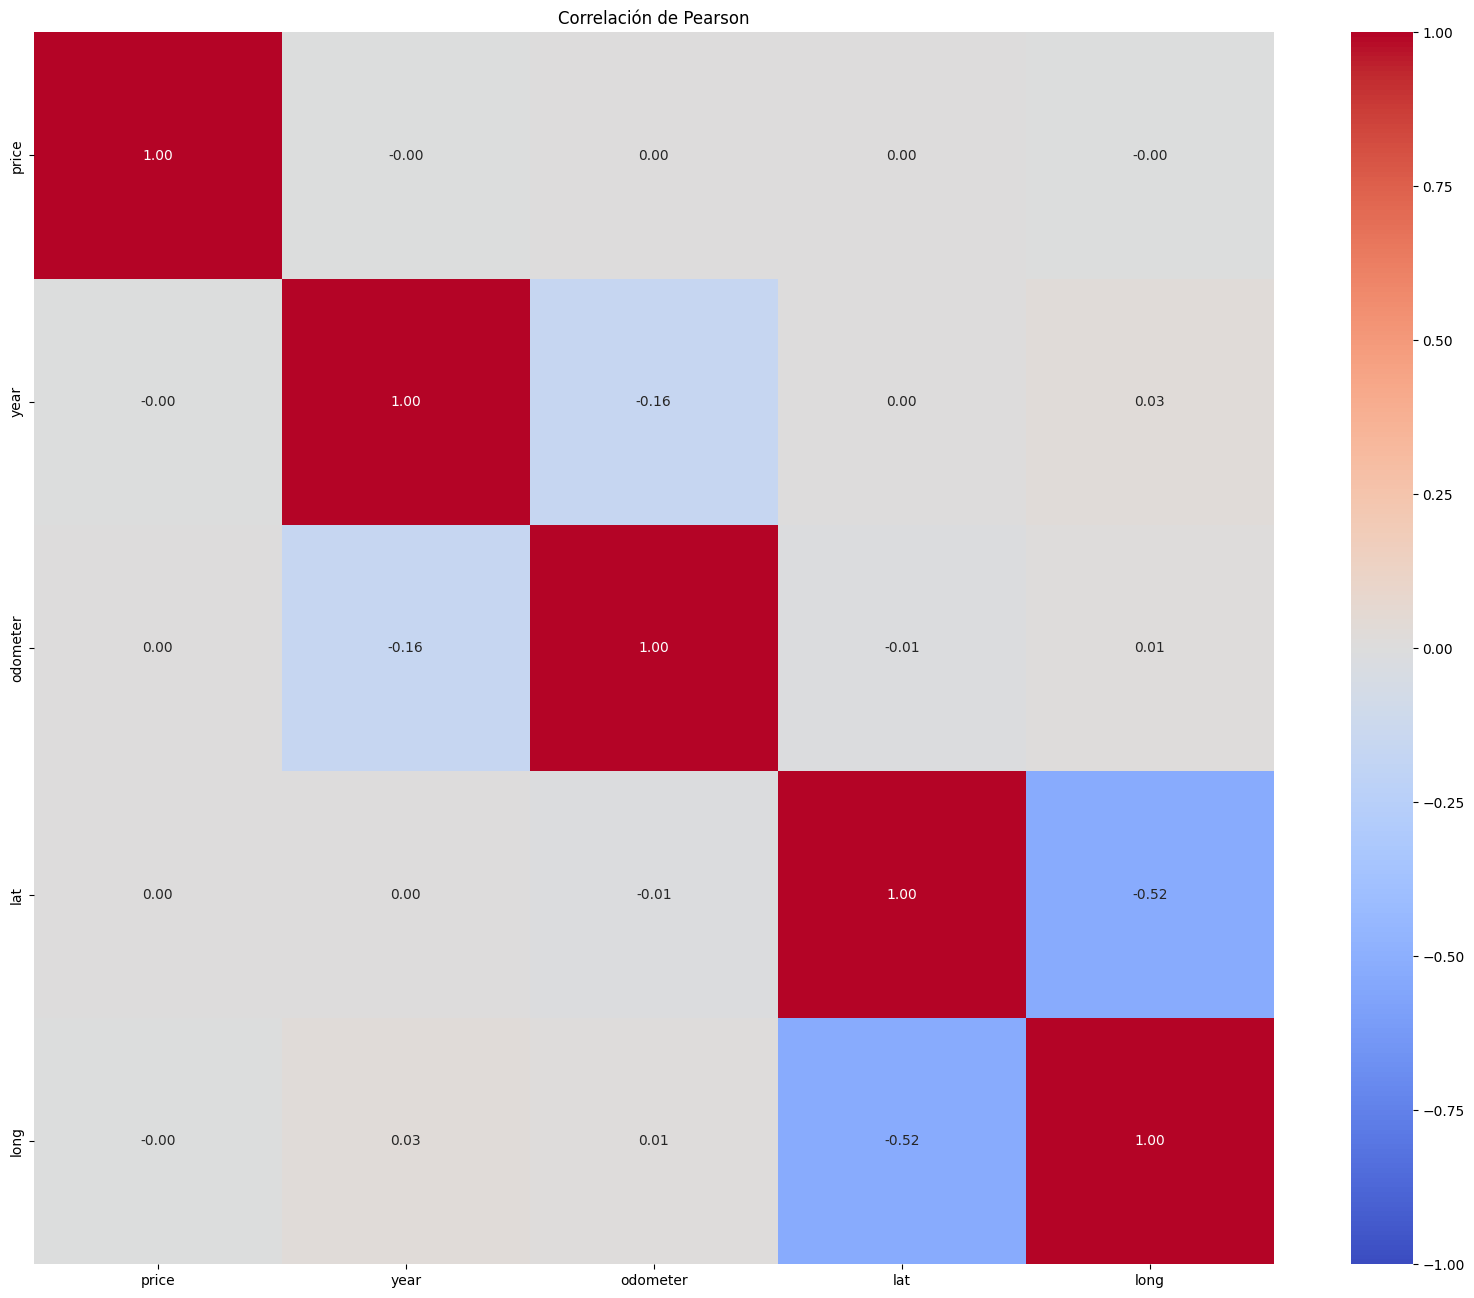

In [13]:
df_numeric = df.select_dtypes(include=['number'])

correlation_matrix_pearson = df_numeric.corr(method='pearson')

plt.figure(figsize=(20, 16))
plt.title('Correlación de Pearson')
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

In [ ]:
sns.histplot(df['price'], kde=True)
plt.show()

In [ ]:
df['log_price'] = np.log1p(df['price'])
sns.histplot(df['log_price'], kde=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['year_scaled'] = scaler.fit_transform(df[['year']])
df['odometer_scaled'] = scaler.fit_transform(df[['odometer']])
df['lat_scaled'] = scaler.fit_transform(df[['lat']])
df['long_scaled'] = scaler.fit_transform(df[['long']])

## - Realizar transformaciones necesarias para las características categóricas.

In [ ]:
show_unique_values(df)

Column: region
Unique values: ['auburn' 'birmingham' 'dothan' 'florence / muscle shoals'
 'gadsden-anniston' 'huntsville / decatur' 'mobile' 'montgomery'
 'tuscaloosa' 'anchorage / mat-su' 'fairbanks' 'kenai peninsula'
 'southeast alaska' 'flagstaff / sedona' 'mohave county' 'phoenix'
 'prescott' 'show low' 'sierra vista' 'tucson' 'yuma' 'fayetteville'
 'fort smith' 'jonesboro' 'little rock' 'texarkana' 'bakersfield' 'chico'
 'fresno / madera' 'gold country' 'hanford-corcoran' 'humboldt county'
 'imperial county' 'inland empire' 'los angeles' 'mendocino county'
 'merced' 'modesto' 'monterey bay' 'orange county' 'palm springs'
 'redding' 'reno / tahoe' 'sacramento' 'san diego' 'san luis obispo'
 'santa barbara' 'santa maria' 'SF bay area' 'siskiyou county' 'stockton'
 'susanville' 'ventura county' 'visalia-tulare' 'yuba-sutter' 'boulder'
 'colorado springs' 'denver' 'eastern CO' 'fort collins / north CO'
 'high rockies' 'pueblo' 'western slope' 'eastern CT' 'hartford'
 'new haven' 'nort

In [ ]:
df_copy.to_csv('exported_df_copy.csv', index=False)

In [ ]:
#No soportó
#df_encoded = pd.get_dummies(df_copy, columns=['manufacturer', 'manufacturer', 'model', 'fuel', 'title_status',
#                                              'transmission', 'type', 'state'])

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns_to_encode = ['region', 'paint_color', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'type', 'state']

for column in columns_to_encode:
    df[column + '_encoded'] = le.fit_transform(df[column])

In [ ]:
# Eliminar columnas especificadas
columns_to_drop = ['region', 'paint_color', 'manufacturer', 'model', 'fuel', 'title_status', 'transmission', 'type', 'state', 'posting_date']
df = df.drop(columns=columns_to_drop, errors='ignore')

# Muestra las columnas restantes (opcional)
df.columns

Index(['price', 'year', 'odometer', 'lat', 'long', 'region_encoded',
       'paint_color_encoded', 'manufacturer_encoded', 'model_encoded',
       'fuel_encoded', 'title_status_encoded', 'transmission_encoded',
       'type_encoded', 'state_encoded'],
      dtype='object')

# 3) Exploración de Datos:



## - Crear visualizaciones univariadas y multivariadas.


In [ ]:
df['price'] = df['price'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69166 entries, 27 to 106718
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 69166 non-null  float64
 1   year                  69166 non-null  float64
 2   odometer              69166 non-null  float64
 3   lat                   69166 non-null  float64
 4   long                  69166 non-null  float64
 5   region_encoded        69166 non-null  int64  
 6   paint_color_encoded   69166 non-null  int64  
 7   manufacturer_encoded  69166 non-null  int64  
 8   model_encoded         69166 non-null  int64  
 9   fuel_encoded          69166 non-null  int64  
 10  title_status_encoded  69166 non-null  int64  
 11  transmission_encoded  69166 non-null  int64  
 12  type_encoded          69166 non-null  int64  
 13  state_encoded         69166 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 7.9 MB


In [ ]:
columns_to_drop = ['year', 'odometer', 'lat', 'long']
df = df.drop(columns=columns_to_drop, errors='ignore')


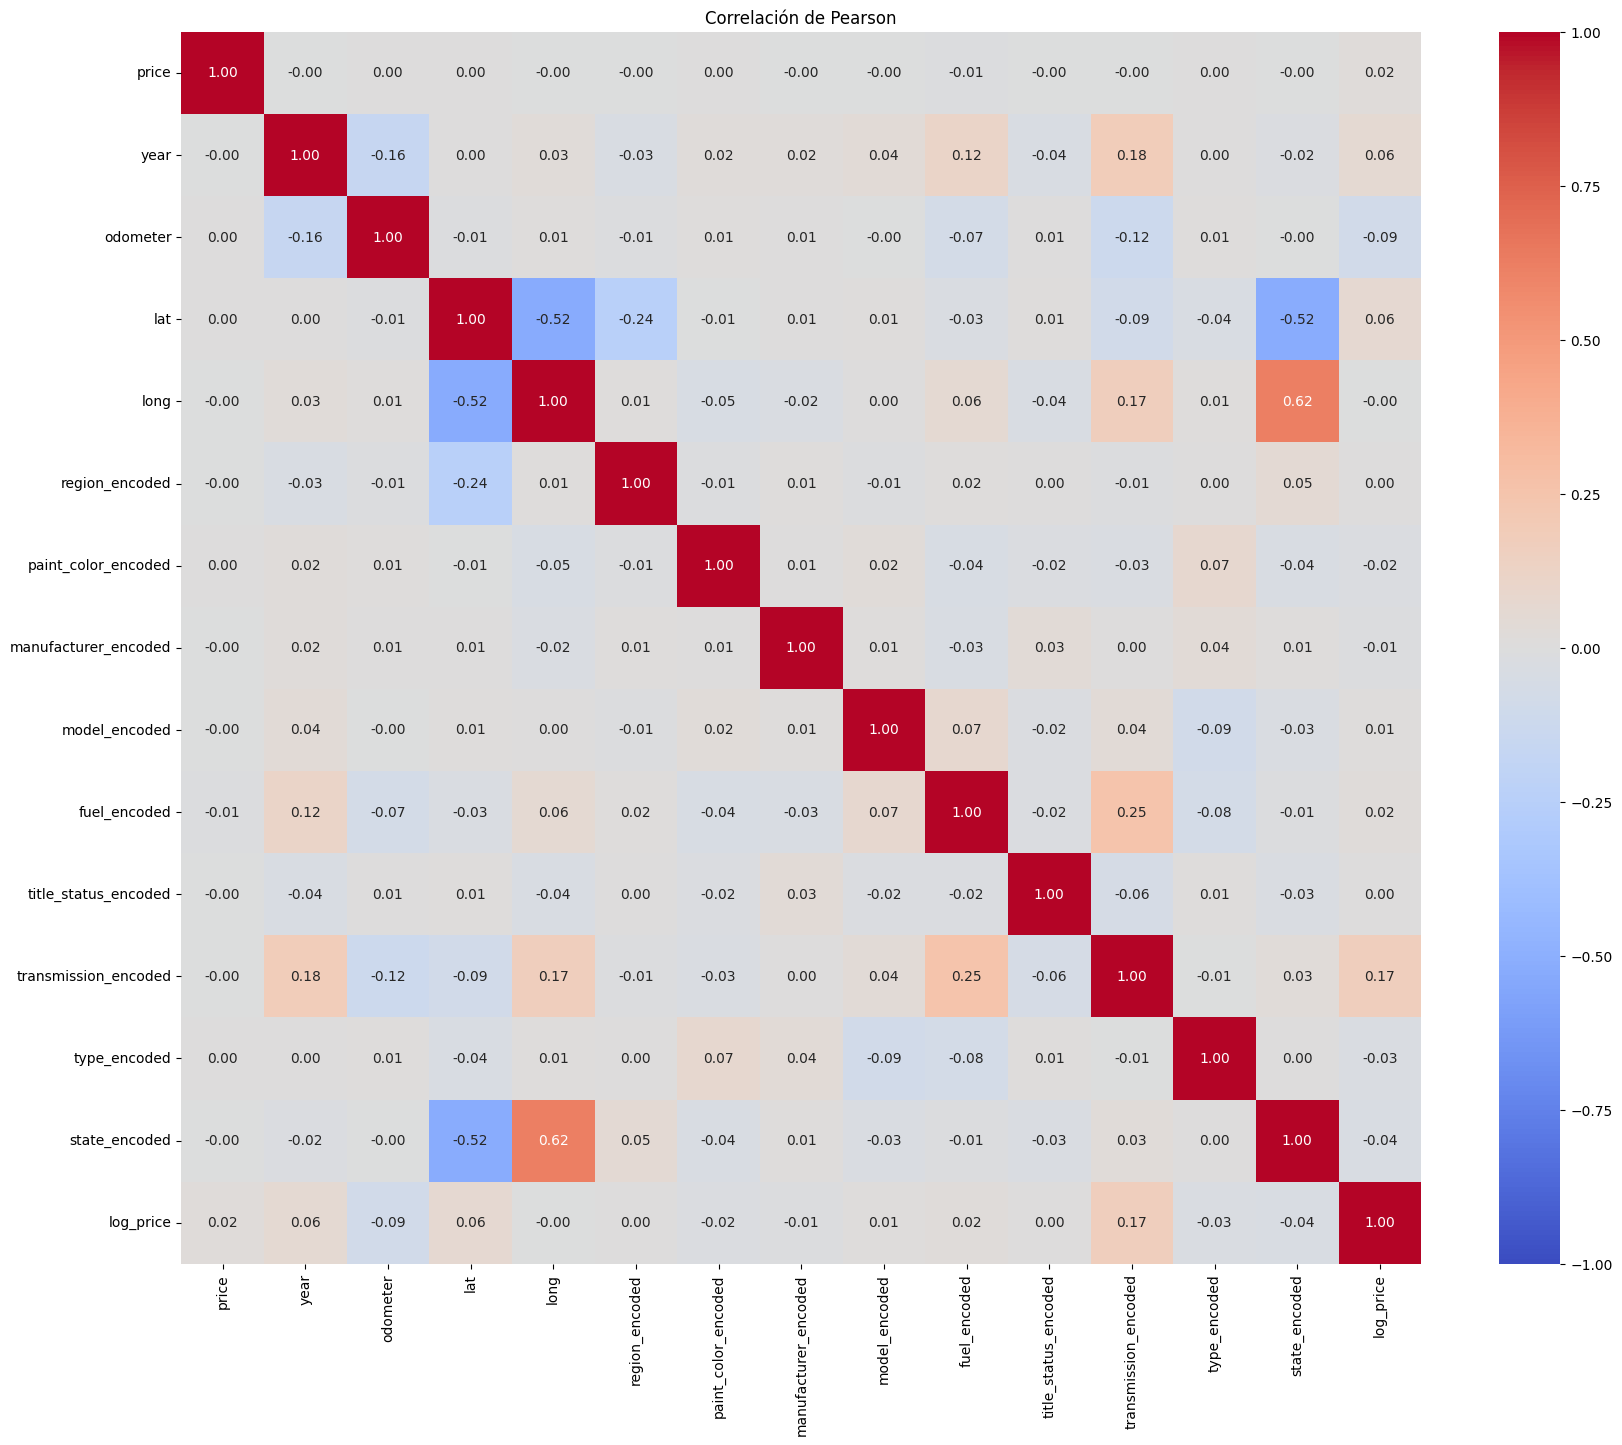

In [ ]:
correlation_matrix_spearman = df.corr(method='pearson')

plt.figure(figsize=(20, 16))
plt.title('Correlación de Pearson')
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.show()

## - Calcular estadísticas descriptivas.

In [ ]:
df.describe()

,price,year,odometer,lat,long,region_encoded,paint_color_encoded,manufacturer_encoded,model_encoded,fuel_encoded,title_status_encoded,transmission_encoded,type_encoded,state_encoded,log_price
count,6.916600e+04,69166.000000,6.916600e+04,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000,69166.000000
mean,3.450736e+04,2011.698060,9.511299e+04,36.478329,-105.593611,39.076497,5.866524,19.119943,4228.035769,2.064830,0.101524,0.401614,6.694677,4.586733,8.870963
std,4.224814e+06,8.627806,2.092272e+05,6.488117,19.400843,24.156094,4.107659,11.545160,2340.795053,0.766965,0.658100,0.764725,4.026393,2.296774,2.671851
min,0.000000e+00,1900.000000,0.000000e+00,-81.838232,-158.599600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000e+03,2009.000000,3.782075e+04,33.508275,-120.445530,19.000000,1.000000,10.000000,2271.000000,2.000000,0.000000,0.000000,3.000000,4.000000,8.853808
50%,1.550000e+04,2014.000000,8.200300e+04,35.393500,-111.924900,39.000000,8.000000,16.000000,4166.000000,2.000000,0.000000,0.000000,8.000000,4.000000,9.648660
75%,2.699000e+04,2017.000000,1.295700e+05,38.870000,-84.411811,59.000000,10.000000,30.000000,6445.000000,2.000000,0.000000,0.000000,9.000000,5.000000,10.203259
max,1.111111e+09,2022.000000,1.000000e+07,64.993698,173.885502,79.000000,11.000000,40.000000,8255.000000,4.000000,5.000000,2.000000,13.000000,9.000000,20.828626


### -> Análisis
Ya se revisaron arriba

# 4) Modelado y Evaluación:



## - Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).


## - Evaluar los modelos utilizando MSE, RMSE, y R^2.


## - Seleccionar el mejor modelo basado en las métricas de evaluación.

#5) Optimización del Modelo:



## - Optimizar el modelo seleccionado utilizando GridSearchCV.

#6) Documentación y Entrega:

- Documentar todo el proceso en un archivo .ipynb claramente comentado.
- Crear visualizaciones con interpretaciones.
- Subir el archivo a un repositorio en GitHub con un tag de liberación.

# Conclusión



En mi caso, después de mucho trabajarle y revisar, con datos descargados de kaggle y subidos al colab, o descargados directamente de kaggle en el colab,

No encontré ninguna correlación en las variables

Después de dos semanas, decido entregar esto así, dado que, si bien considero que no hice el ejercicio, no sé que pasa con los datos o conmigo, que esto no me quiere funcionar,

Incluso revisé por aparte una correlación apenas se cargaron todos los datos y price no me da para relacionar con nada, así que no supe que hacer y por cuestiones de tiempo prefiero entregarlo así

mis más sinceras disculpas por el trabajo mediocre




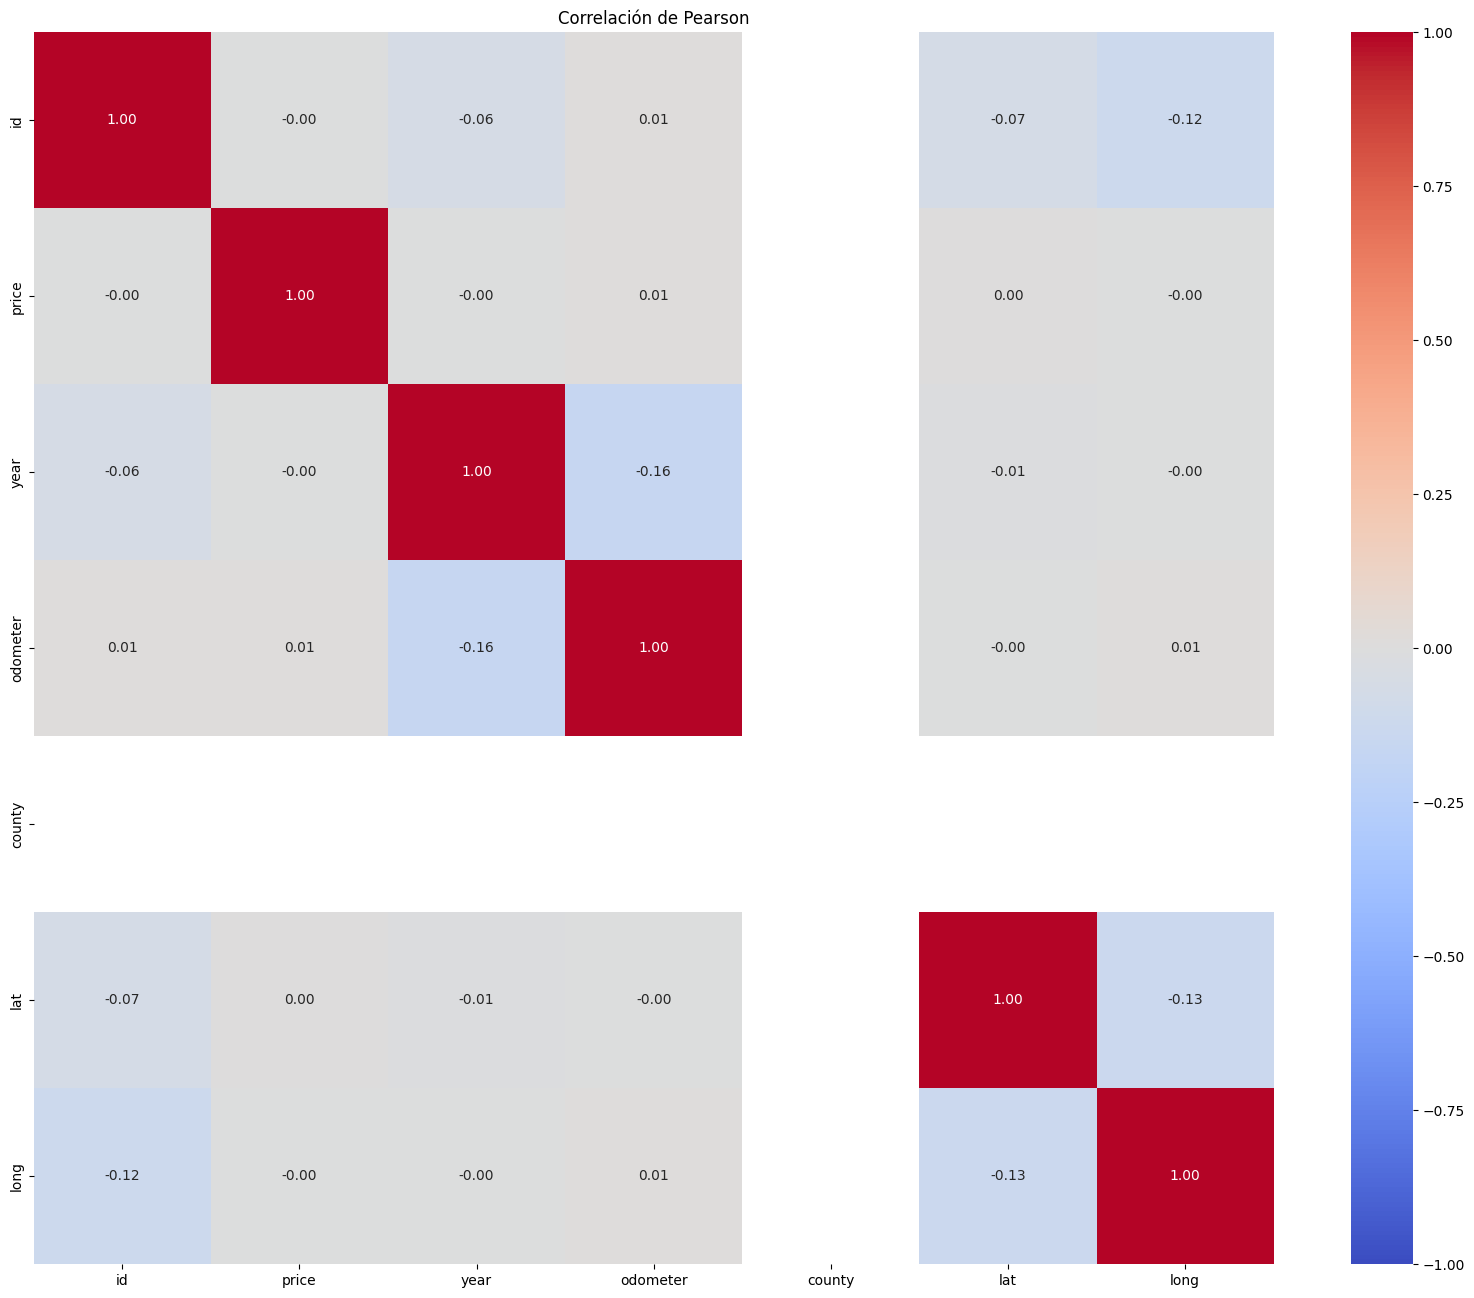